# Visualisasi Data Menggunakan Matplotlib

- matplotlib adalah standar library untuk visualisasi dengan python
- Matplotlib.Pyplot adalah kumpulan fungsi gaya perintah yang dapat membuat Matplotlib dapat berfungsi seperti MATLAB. 
- setiap fungsi pyplot membuat beberapa perubahan pada gambar misalnya membuat gambar, area plot, membuat plot beberapa garis di area plotting, menghiasi plot
- Dimulai dengan mengimpor Matplotlib  dan Matplotlib.pyplot

# IMIGRASI DI KANADA

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.4.3


In [3]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


##### plotting di Pandas
- Pandas memiliki penerapan Matplotlib bawaan yang dapat digunakan dengan mudah
- membuat plot di pandas semudah menambahkan metode .plot() pada suatu series atau dataframe

##### Line Pots
- Line Plot adalah jenis plot yang menampilkan informasi sebagai rangkaian titik data yang disebut 'markers' yang dihubungkan dengan segmen garis lurus. 
- Line Plot dalah bagan dasar yang umum digunakan dalam banyak bidang, 
- paling baik digunakan untuk visualisasi data berbasis tren selama periode waktu tertentu

In [4]:
df_can = pd.read_excel('Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [6]:
df_can['Total']=df_can.sum(axis=1)

/tmp/ipykernel_233/1816195432.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']=df_can.sum(axis=1)


In [7]:
df_can.set_index('Country', inplace=True)

In [8]:
df_can.columns=list(map(str, df_can.columns))

In [9]:
years = list(map(str, range(1980, 2014)))

In [10]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [11]:
print('data dimensions: ', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions:  (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,18433


In [12]:
haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

## Imigrasi Haiti
- pada tahun 2010 terjadi bencana gempa bumi berkekuatan 7,0 SR di Haiti.
- Gempe tersebut menyebabkan kerusakan dan korban jiwa dan tiga juta orang terdampak oleh gempa
- Pemerintah Kanada meningkatkan upaya kemanusiaan dengan menerima pengungsi dari Haiti
- Hal ini dapat dilihat melalui plot berikut

<AxesSubplot:>

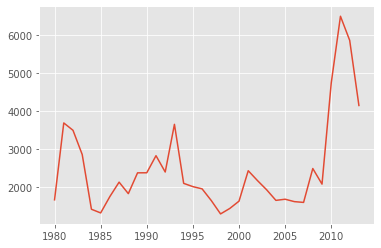

In [13]:
haiti.plot()

- menambahkan judul dengan plt.title
- menambahkan label dengan plt.ylabel pada sumbu y dan plt.xlabel pada sumbu x

Text(0.5, 0, 'Years')

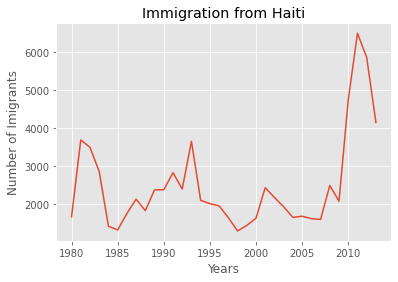

In [14]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Imigrants')
plt.xlabel('Years')

- menambahkan text untuk menandai adanya lonjakan imigran dari hati di kanada dengan plt.text(x, y, 'text')
- karena x dan y tipe int maka disesuaikan langsung dengan titik x dan y
- apabila x berupa str, maka perlu nilai index yang lebih spesifik untuk posisi tahun
- lonjakan imigran dari haiti dapat divisualisasikan dengan beberapa baris kode

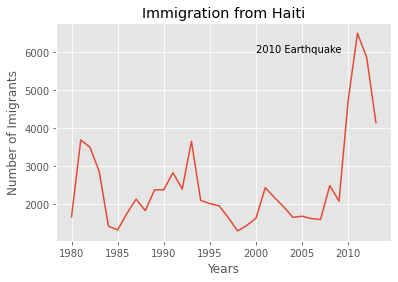

In [15]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Imigrants')
plt.xlabel('Years')

plt.text(2000, 6000, '2010 Earthquake')

plt.show()

## Imigran China dan India

- dapat membuat lebih banyak garis plot untuk membandingkan data imigrasi

In [16]:
China_India = df_can.loc[['China', 'India'], years]
China_India

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<AxesSubplot:xlabel='Country'>

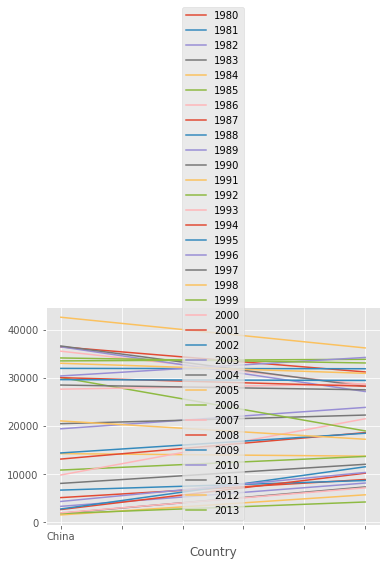

In [17]:
China_India.plot(kind='line')

- pandas memplot indeks pada sumbu x dan kolom sebagai garis individu pada sumbu y.
- hal ini disebabkan karena country sebagai index dan years sebagai kolom.
- diperlukan mengubah susunan kerangka data menggunakan metode transpose()

In [18]:
df_CI = China_India.transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


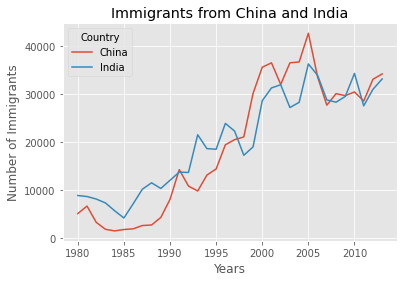

In [19]:
df_CI.plot(kind='line')
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

- dari kurva dapat disimpulkan bahwa China dan Indi selama bertahun - tahun memiliki tren imigrasi yang sangat mirip

- Line plot merupakan alat yang praktis untuk menampilkan beberapa variabel dependen terhadap suatu variabel independen.
- Tetapi, akan lebih baik apabila pada satu grafik hanya terdapat 5-10 kurva karena lebih dari itu akan sangat sulit dibaca

- Berikut akan dibandingkan tren imigran pada 5 negara yang berkontribusi untuk imigrasi terbanyak ke Kanada

In [20]:
df_can.sort_values(by='Total', ascending=False, axis = 0, inplace = True)

In [21]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,2744
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2739
Canada,Northern America,Northern America,Developed regions,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,2731


## 5 Negara dengan Imigran Terbanyak di Kanada

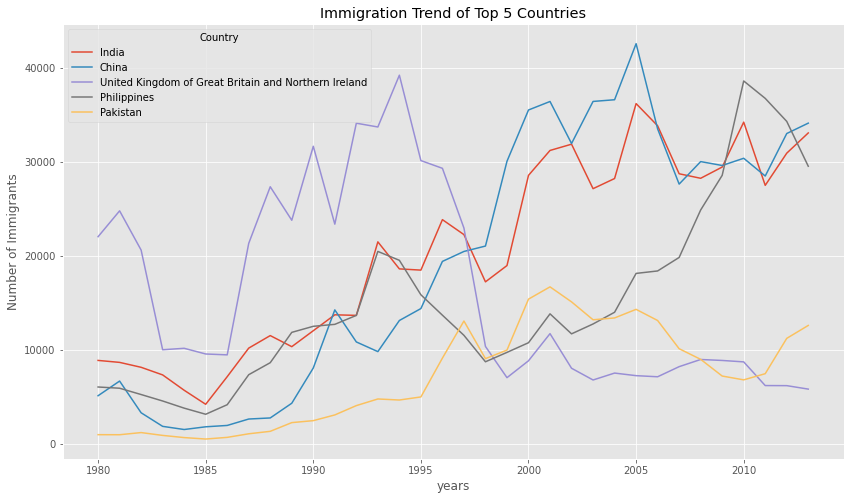

In [22]:
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
df_top5.index=df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('years')

plt.show()

##### Area Plots
- plot dapat divisualisasikan dengan cumulative plot yang dikenal sebagai Stacked line plot atau area plot

In [23]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


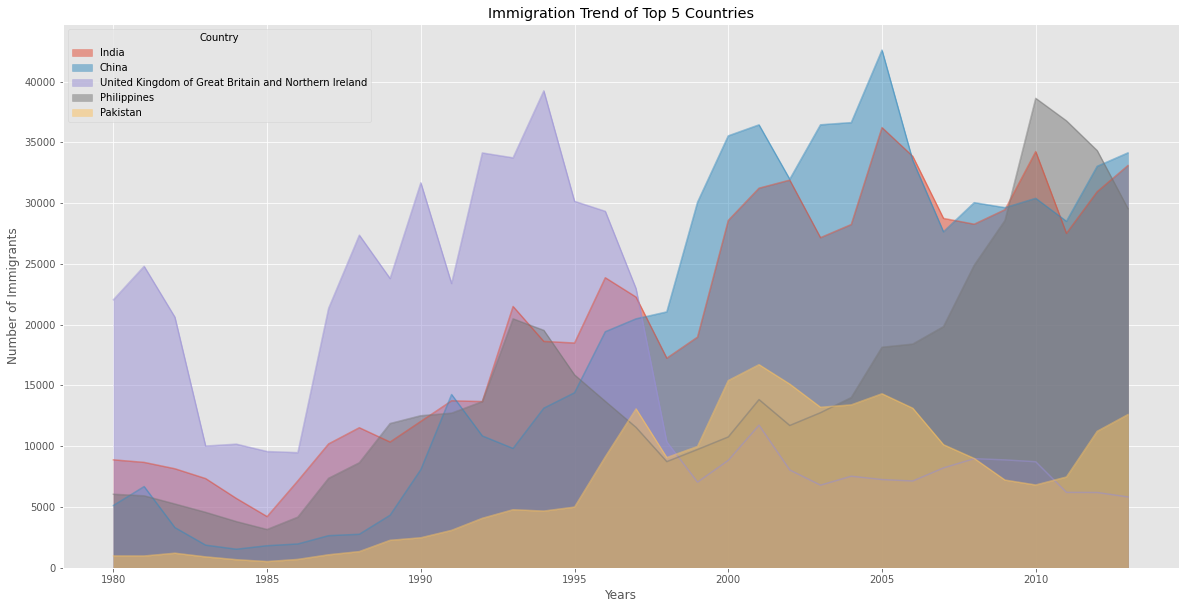

In [24]:
df_top5.index=df_top5.index.map(int)
df_top5.plot(kind='area', stacked=False, figsize=(20,10),)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

- mengubah transparasinya dengan memasukan parameter alpha = 0-1

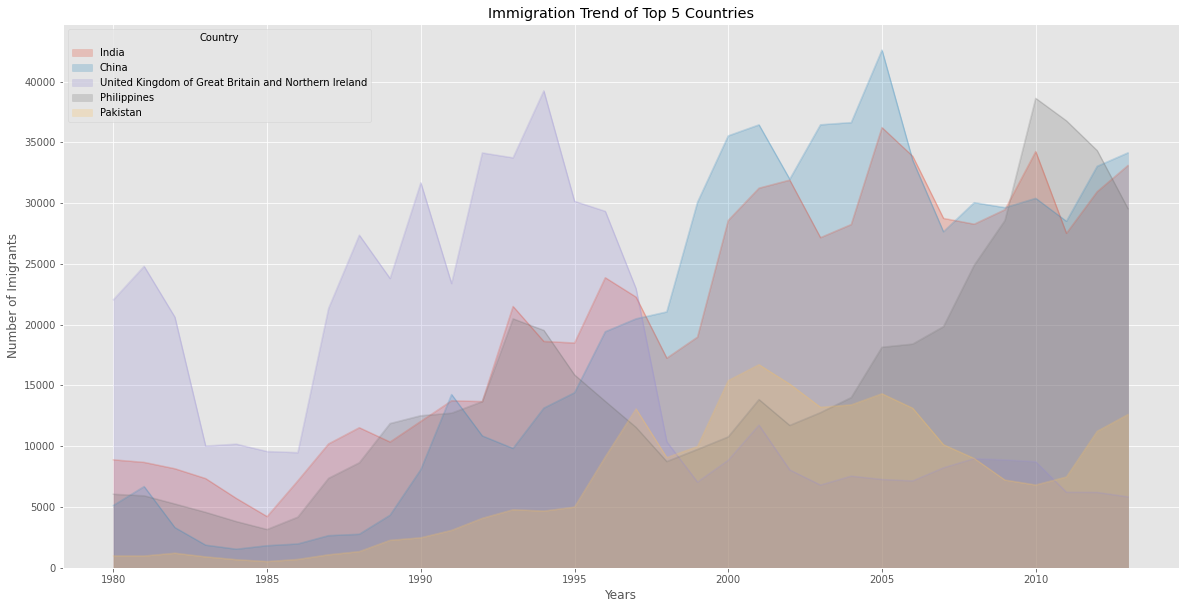

In [25]:
df_top5.plot(kind='area', alpha=0.25, stacked=False, figsize=(20,10),)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Imigrants')
plt.xlabel('Years')
plt.show()

- terdapat 2 gaya dalam membuat plot dalam matplotlib. yaitu: artist layer dan scripting layer
- scripting layer menggunakan matplotlib.pyplot as plt. 
    - dengan plt dapat menambahkan banyak elemen dengan memanggil metode yang berbeda secara prosedural.
    - plt.title untuk judul, plt.xlabel untuk label pada sumbu x
- artist layer adalah metode object oriented yang menggunakan Axes daripada matplotlib. Kita dapat menggunakan Axes dari plot dan menyimpannya dalam variabel misalnya ax
    - dapat menambahkan lebih banyak elemen dengan memanggil metode yang perlu sedikit perubahan dalam sintaks dengan menambahkan 'set_'
    - misalnya ax.set_title() sebagai ganti plt.title
    - ax.set_xlabel pengganti plt.xlabel()
    - metodenya lebih transparan, fleksibel


Text(0.5, 0, 'Years')

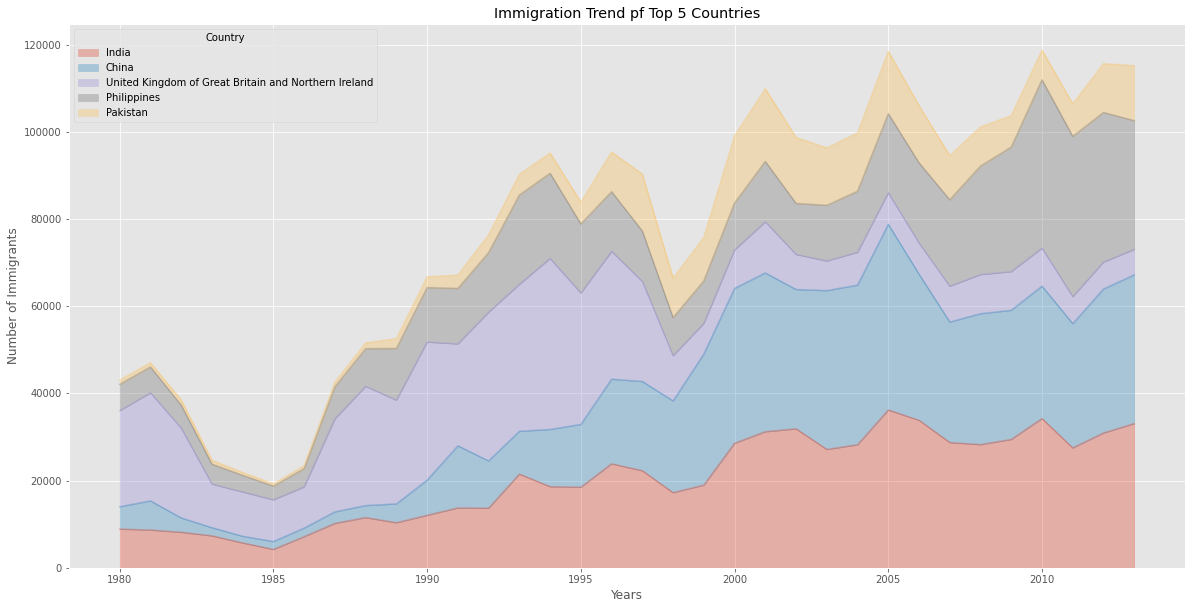

In [26]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20,10))
ax.set_title('Immigration Trend pf Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

## 5 Negara dengan Imigran Paling Sedikit di Kanada pada tahun 1980 sampai 2013

In [27]:
df_can.tail()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,2744
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2739
Canada,Northern America,Northern America,Developed regions,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,2731
Sao Tome and Principe,Africa,Middle Africa,Developing regions,0,0,0,0,0,0,0,...,1,1,0,0,1,2,0,0,1,2726
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719


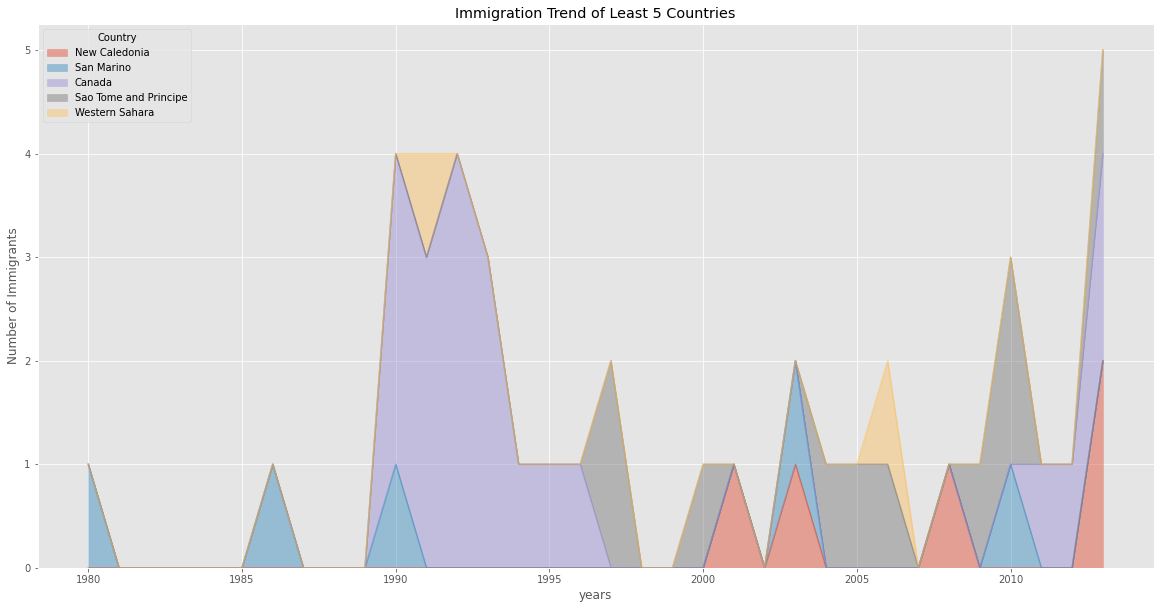

In [28]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()

df_least5.plot(kind='area', 
                        alpha=0.45, 
                        stacked=True, 
                        figsize=(20,10),
                        )
plt.title('Immigration Trend of Least 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('years')

plt.show()

Text(0.5, 0, 'Years')

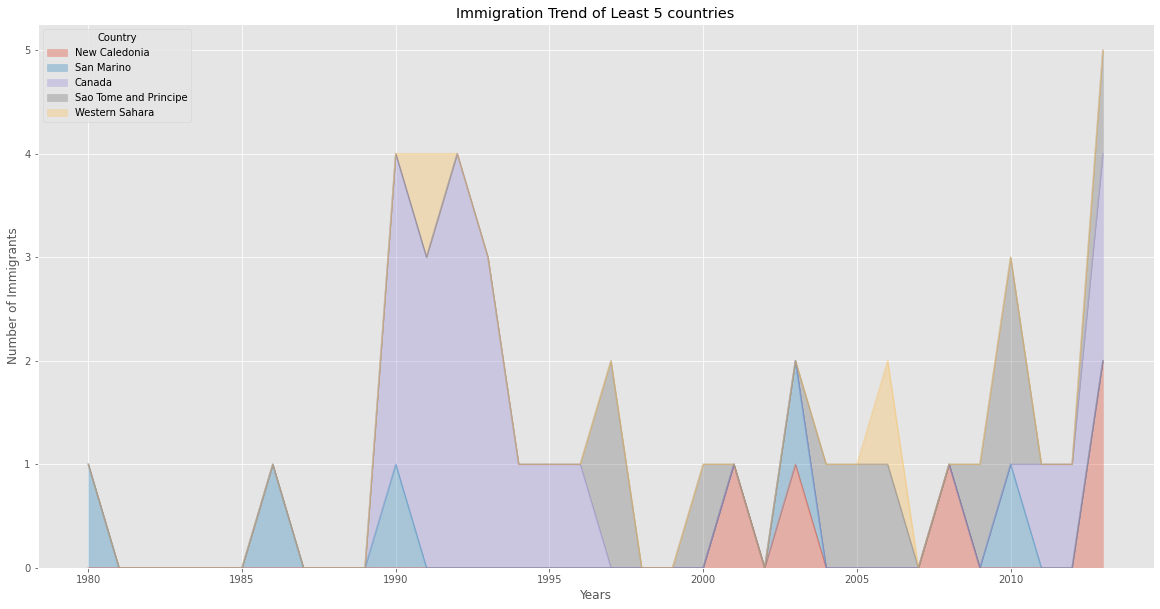

In [29]:
ax = df_least5.plot(kind='area', alpha=0.35, figsize=(20,10))
ax.set_title('Immigration Trend of Least 5 countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

##### Histogram
- cara untuk mempresentasikan distribusi frekuensi dari dataset numerik
- histogram mempartisi sumbu x menjadi beberapa bin, dan menetapkan setiap titik data dalam kumpulan data kita ke sebuah bin, dan kemudian menghitung jumlah titik data yang telah ditetapkan ke setiap bin.
- sumbu y = frekuensi / banyaknya titik data pada setiap bin
- perlu untuk disesuaikan agar distribusi yang ditampilkan baik

## Imigrasi pada Tahun 2013

In [30]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

- secara default dataset akan dipecah menjadi 10 bin

In [31]:
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


- sumbu x : kisaran populasi imigran
- sumbu y : mewakili jumlah negara yang berkontribusi
- tetapi sumbu x tidak cocok dengan ukuran bin karena secara default tidak langsung berubah

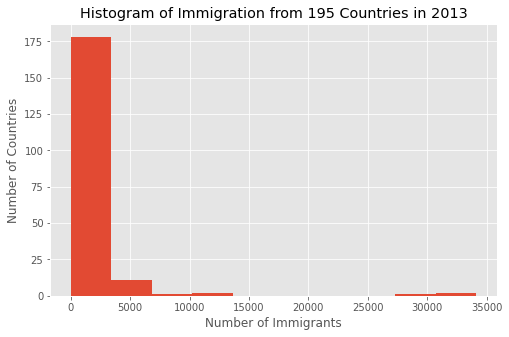

In [32]:
df_can['2013'].plot(kind='hist', figsize=(8,5))
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

- nilai bin diperbaiki dengan memasukan xticks yang berisi daftar untuk ukuran bin

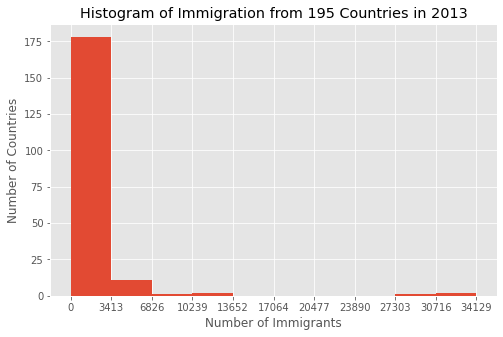

In [33]:
count, bin_edges= np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

- dalam menuliskan kode some_data.plot(kind='type_plot', ...) = some_data.plot.type_plot(...)
- dapat memplot beberapa histogram dalam plot yang sama

## Distribusi imigrasi untuk Denmark, Norway, dan Sweden pada tahun 1980 - 2013 di Kanada

- memanggil data set Denmark, Norway, dan Sweden

In [34]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


- agar menghasilkan plot histogram yang benar maka perlu dilakukan transpose

In [35]:
df_d_n_s_t= df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_d_n_s_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


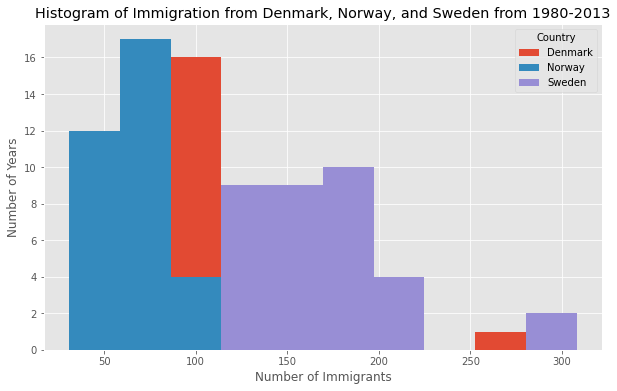

In [36]:
df_d_n_s_t.plot(kind='hist', figsize=(10,6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

- untuk meningkatkan nilai estetika dari sebuah plot maka perlu ditambahkan beberapa detail
- mengubah ukuran bin menjadi 15 dengan bins parameter
- mengubah transparansi menjadi 60% dengan alpha parameter
- mengubah sumbu x yang sesuai dengan bin dengan parameter xticks
- mengubah warna dari plot dengan color parameter


<AxesSubplot:ylabel='Frequency'>

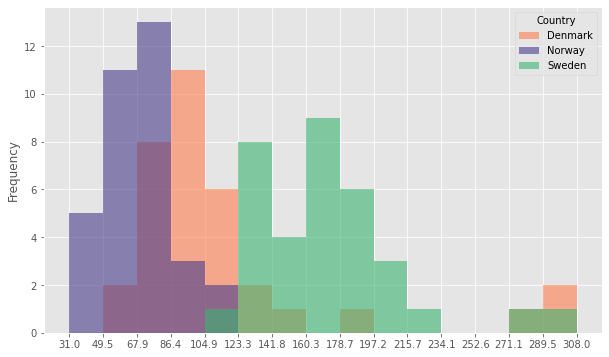

In [37]:
count, bin_edges= np.histogram(df_d_n_s_t, 15)
df_d_n_s_t.plot(kind = 'hist', figsize=(10, 6), bins = 15, alpha=0.6, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])

- untuk melihat list warna yang tersedia di dalam Matplotlib

In [38]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


- apabila ingin melihat plot agar tidak saling tumpang tindih, maka dapat diubah dengan menggunakan parameter stacked
- label sumbu x dapat disesuaikan untuk menghilangkan celah dengan x min dan max atau dengan parameter xlim

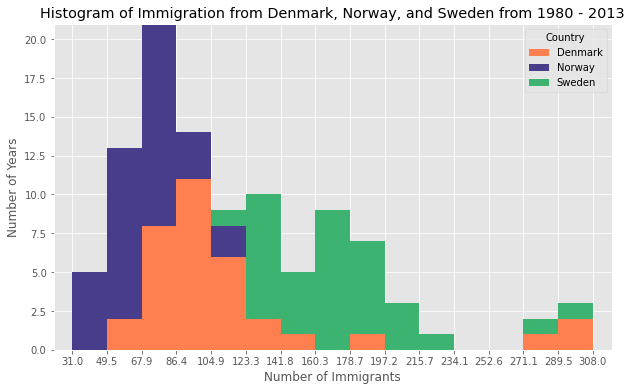

In [39]:
count, bin_edges=np.histogram(df_d_n_s_t, 15)
xmin = bin_edges[0]-10
xmax = bin_edges[-1]+10
df_d_n_s_t.plot(kind='hist', figsize=(10,6), bins = 15, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'], stacked=True, xlim=(xmin, xmax))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

## Distribusi Imigrasi untuk Greece, Albania, dan Bulgaria pada 1980-2013

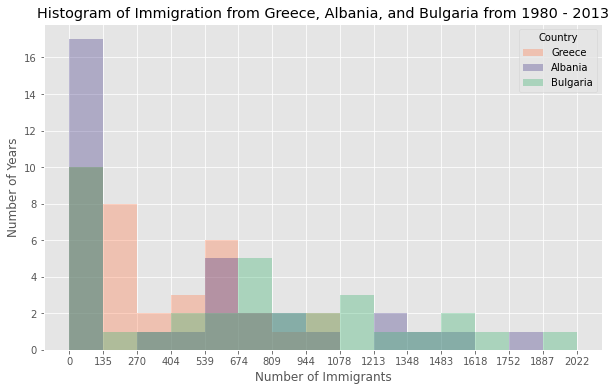

In [40]:
df_g_a_b= df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_g_a_b=df_g_a_b.transpose()

count, bin_edges = np.histogram(df_g_a_b, 15)
df_g_a_b.plot(kind= 'hist', figsize =(10,6), bins = 15, alpha = 0.35, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

### Dataframe dengan Bar Charts
- salah satu presentasi data dengan panjang batang yang mempresentasikan besaran/ ukuran dari fitur/ variabel
- Kurva batang mewakili variabel numerik yang dikelompokan dalam interval
- kind = 'bar' untuk batang vertika;
- kind = 'barh' untuk batang horizontal

## Imigrasi Islandia
- Krisis keuangan di Islandia pada tahun 2008 - 2011 merupakan peristiwa ekonomi dan politik utama
- Terjadi keruntuhan perbankan terbesar di negara manapun dalam sejarah ekonomi
- hal ini menyebabkan depresi ekonomi yang parah dan kerusuhan politik yang besar
- meri mengamati data imigrasi Islandia pada tahun 1980 - 2013

In [41]:
df_iceland= df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

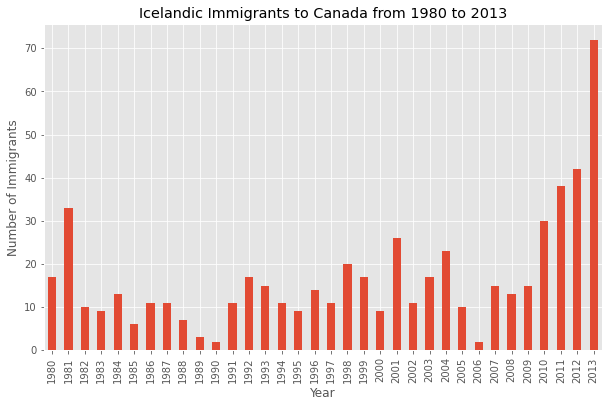

In [42]:
df_iceland.plot(kind='bar', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.show()

- dapat diketahui bahwa jumlah imigran ke Kanada meningkat pesat setelah 2008

### membuat kurva dengan anotatate
- anotate berguna untuk memberikan tambahan symbol atau legenda yang berada diatas dari plot


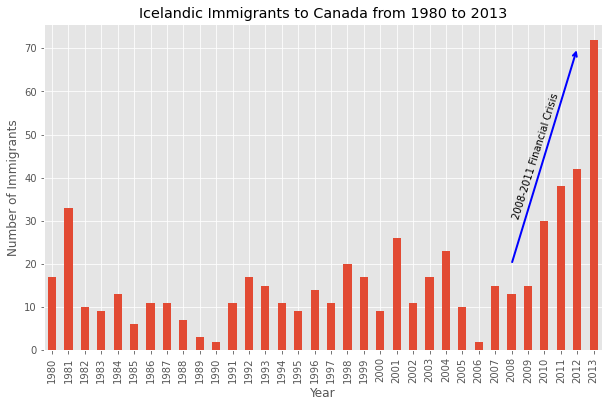

In [43]:
df_iceland.plot(kind='bar', figsize=(10,6), rot=90)
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
# annotate arrow
plt.annotate('', xy=(32,70), xytext=(28,20), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color = 'blue', lw=2))
# annotate text
plt.annotate('2008-2011 Financial Crisis', xy=(28,30), rotation=72.5, va='bottom', ha='left')
plt.show()


### Horizontal bar plot
- presentasi dengan data horizontal
- sumbu y = pelabelan
- sumbu x = besaran variabel yang diukur
- terdapat lebih banyak ruang untuk mengkategorikan variabel

## 15 Negara dengan Imigran Terbanyak di Kanada Selama 1980-2013

In [44]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15= df_can['Total'].tail(15)
df_top15

Country
Romania                                                  96317
Viet Nam                                                 99903
Jamaica                                                 109152
France                                                  111826
Lebanon                                                 118118
Poland                                                  141973
Republic of Korea                                       145324
Sri Lanka                                               155696
Iran (Islamic Republic of)                              183261
United States of America                                243833
Pakistan                                                248938
Philippines                                             514148
United Kingdom of Great Britain and Northern Ireland    554233
China                                                   662705
India                                                   699242
Name: Total, dtype: int64

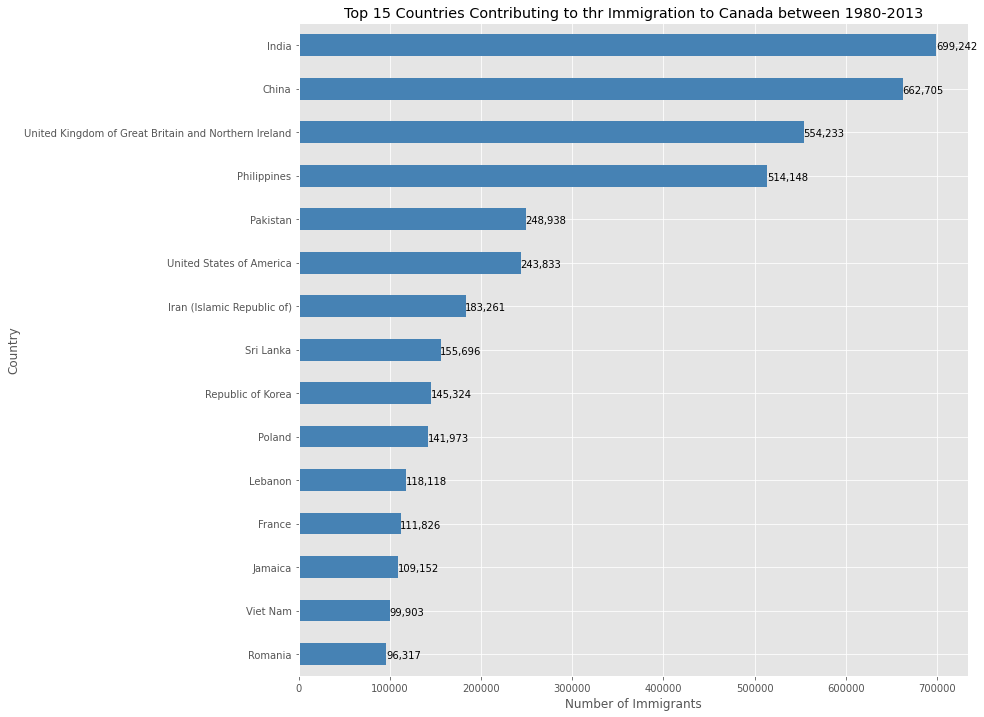

In [45]:
df_top15.plot(kind='barh', figsize=(12,12), color = 'steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to thr Immigration to Canada between 1980-2013')
for index, value in enumerate(df_top15):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 500, index - 0.1), color = 'black')
plt.show()

### Pie Chart
- grafik circular yang menampilkan proporsi numerik dengan membagi lingkaran menjadi bentuk pie dengan irisan yang proposional sesuai dengan variabek
- kind = 'pie'

In [46]:
df_continents = df_can.groupby('Continent', axis = 0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564


## Imigrasi ke Kanada berdasarkan Benua [1980-2013]

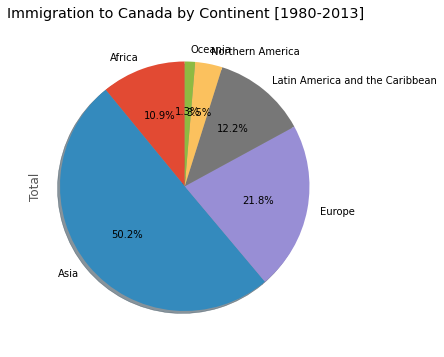

In [47]:
df_continents['Total'].plot(kind='pie', figsize=(5,6), autopct = '%1.1f%%', startangle=90, shadow=True)
plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal')
plt.show()

- pie yang dihasilkan tidak jelas
- terjadi tumpang tindih antara angka dan teks
- kita dapat mengubah legend yang berada di samping legend dengan menambahkan legend yang terpisah dengan plt.legend
- presentase dapat ditulis diluar pie dengan 'pctdistance'
- dapat memilih set warna dengan menambahkan list color di dalam parameter 'colors'
- explode di dalam pie dapat  menekankan 3 data terendah dengan parameter 'explode' sehingga 3 data tersebut dapat terlihat dengan lebih jelas

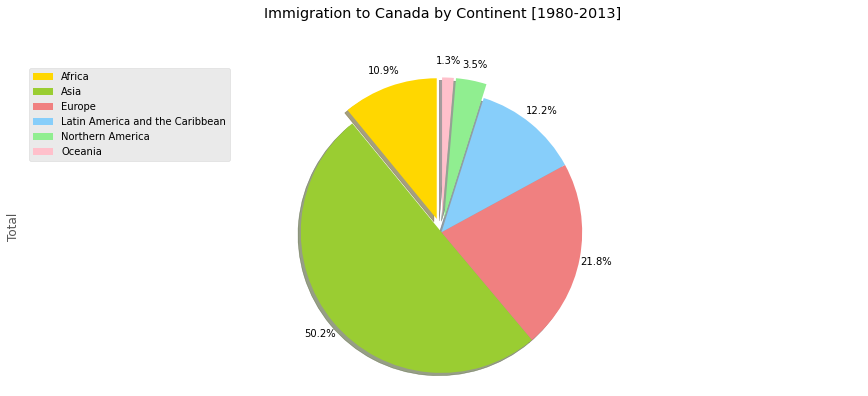

In [49]:
color_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']
explode_list=[0.1, 0, 0, 0, 0.1, 0.1]
df_continents['Total'].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=color_list, explode=explode_list)
plt.title('Immigration to Canada by Continent [1980-2013]', y =1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

## Imigran 2013 berdasarkan asal benuanya|

In [ ]:
df_continents['2013'].plot(kind='pie', fi)